# Karol Peszek - Opracowanie pomiarów z zadania M8
## Zestaw pomiarowy 24

### 1. Cel ćwiczenia
Celem doświadczenia jest zbadanie dynamiki ruchu precesyjnego bąka symetrycznego. W szczególności analizie podlegają:
- Zależność okresu precesji $T_p$ od okresu obrotu tarczy $T$.
- Wpływ masy dodatkowego obciążenia m na częstość precesji
- Wyznaczenie bezwładności obrotowej tarczy $J$ dwiema metodami dynamicznymi i jedną geometryczną

### 2. Podstawy teoretyczne

![](gyroscope.png)

Żyroskop (bąk symetryczny) to bryła sztywna o symetrii obrotowej. Gdy tarcza obraca się z prędkością kątową $\omega$, jej moment pędu wynosi:
$$L = J\omega$$

Jeżeli na żyroskop działa wewnętrzny moment siły $N$ (pochodzący od ciężarka o masie $m$ na ramieniu $r$), to powoduje on zmianę kierunku wektora momentu pędu:
$$N = \frac{dL}{dt}$$

Moment siły jest prostopadły do wektora $\vec{L}$, zatem żyroskop zaczyna wykonywać ruch precesyjny wokół osi pionowej z prędkością kątową $\omega_p$. Zależność opisuje wzór:
$$N_p = J\omega_p\omega$$

### 3. Model matematyczny
W doświadczeniu wykorzystujemy mierzalne parametry, takie jak okres obrotu tarczy $T$ oraz okres precesji $T_p$. Wykorzystując zależność $\omega = \frac{2\pi}{T}$ oraz $\omega_p = \frac{2\pi}{T_p}$, otrzymamy równanie robocze:
$$mgr = \frac{J \cdot 4\pi^2}{T \cdot T_p}$$

Z powyższego wzoru można wyznaczyć moment bezwładności $J$ poprzez analizę regresji liniowej dla dwóch przypadków:
1. Zmiennej masy $m$: badając zależność $\frac{1}{TT_p} = f(m)$
2. Zmiennej prędkości obrotowej: badając zależność $\frac{1}{T_p} = g(T)$

Dodatkowo moment bezwładności tarczy (traktowanej jako krążek o masie $M_t$ i promieniu $R$) obliczany jest ze wzoru geometrycznego:
$$J = \frac{1}{2} M_t R^2$$

![](side_view.png)

### 4. Ładowanie danych

In [1]:
#import odpowiednich bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#ładowanie pomiarów średnicy dysku, promienia siły oraz czasu precesji
disk_diameter = pd.read_csv('https://raw.githubusercontent.com/karolpeszek/pomiar_precesji/refs/heads/main/disk_diameter.csv')
force_radius = pd.read_csv('https://raw.githubusercontent.com/karolpeszek/pomiar_precesji/refs/heads/main/force_radius.csv')
precession_time = pd.read_csv('https://raw.githubusercontent.com/karolpeszek/pomiar_precesji/refs/heads/main/precession_time.csv')

#konwersja tak, aby średnica dysku i promień siły były w metrach
disk_diameter['D'] = disk_diameter['D'] / 100
force_radius['R'] = force_radius['R'] / 100

#konwersja tak, aby masa ciężarka była w kg
precession_time['m'] = precession_time['m'] / 1000

#tworzymy listę mas ciężarków
masses = np.array(precession_time['m'].unique())

#pomiar precesji został dokonany jako połowa okresu więc aby uzyskać cały okres musimy pomnożyć pomiar przez 2
precession_time['T_p'] *= 2

### 5. Obliczenia pośrednie

In [3]:
#obliczamy średnią średnicę dysku i jej niepewność jako odchylenie standardowe
D = disk_diameter['D'].mean()
u_D = disk_diameter['D'].std(ddof=1) #użycie ddof=1 dla niepewności standardowej próby

#stosujemy współczynnik studenta, aby uwzględnić małą liczbę pomiarów
u_D *= 2.776 #dla 5 pomiarów

print(f"Średnia średnica dysku: {D:.3f} m ± {u_D:.3f} m")

Średnia średnica dysku: 0.260 m ± 0.027 m


In [4]:
#obliczamy średni promień siły i jego niepewność
r = force_radius['R'].mean()
u_r = force_radius['R'].std(ddof=1) #użycie ddof=1 dla niepewności standardowej próby

#stosujemy współczynnik studenta, aby uwzględnić małą liczbę pomiarów
u_r *= 2.776 #dla 5 pomiarów

print(f"Średni promień siły: {r:.3f} m ± {u_r:.3f} m")

Średni promień siły: 0.271 m ± 0.010 m


In [5]:
#dla każdego pomiaru czasu precesji obliczamy średni okres obrotu tarczy T = (T1 + T2) / 2 oraz niepewność
precession_time['T'] = (precession_time['T_1'] + precession_time['T_2']) / 2

In [6]:
#dla każdej masy obliczamy 1/T*T_p -> dla każdej masy wartość powinna być stała a jej zmienność wynika z niepewności pomiaru czasu precesji oraz czasu obrotu tarczy
precession_time['inv_T_Tp'] = 1 / (precession_time['T'] * precession_time['T_p'])

In [7]:
#dla każdej masy obliczamy średnią wartość 1/(T*T_p) oraz jej niepewność

T_T_p_inv = np.array([None for _ in masses])
u_T_T_p_inv = np.array([None for _ in masses])

for i, m in enumerate(masses):
    subset = precession_time[precession_time['m'] == m]
    T_T_p_inv[i] = subset['inv_T_Tp'].mean()
    u_T_T_p_inv[i] = subset['inv_T_Tp'].std(ddof=1)

    #stosujemy współczynnik studenta, aby uwzględnić małą liczbę pomiarów
    u_T_T_p_inv[i] *= 2.252 #dla 10 pomiarów
for i, m in enumerate(masses):
    print(f"Dla masy {m:.3f} kg: 1/(T*T_p) = {T_T_p_inv[i]:.6f} 1/s^2 ± {u_T_T_p_inv[i]:.6f} 1/s^2")


Dla masy 0.010 kg: 1/(T*T_p) = 0.074541 1/s^2 ± 0.102413 1/s^2
Dla masy 0.020 kg: 1/(T*T_p) = 0.159938 1/s^2 ± 0.140086 1/s^2
Dla masy 0.030 kg: 1/(T*T_p) = 0.227281 1/s^2 ± 0.323740 1/s^2
Dla masy 0.040 kg: 1/(T*T_p) = 0.431432 1/s^2 ± 0.337438 1/s^2
Dla masy 0.060 kg: 1/(T*T_p) = 0.524299 1/s^2 ± 0.369291 1/s^2
Dla masy 0.070 kg: 1/(T*T_p) = 0.554994 1/s^2 ± 0.212062 1/s^2
Dla masy 0.080 kg: 1/(T*T_p) = 0.722577 1/s^2 ± 0.819681 1/s^2
Dla masy 0.090 kg: 1/(T*T_p) = 0.715545 1/s^2 ± 0.328125 1/s^2
Dla masy 0.100 kg: 1/(T*T_p) = 0.747053 1/s^2 ± 0.694370 1/s^2


In [8]:
#możemy również policzyć błędy względne i sprawdzić, czy są zgodne z oczekiwaniami
relative_errors = u_T_T_p_inv / T_T_p_inv
for i, m in enumerate(masses):
    print(f"Dla masy {m:.3f} kg: błąd względny 1/(T*T_p) = {100 * relative_errors[i]:.2f}%")

Dla masy 0.010 kg: błąd względny 1/(T*T_p) = 137.39%
Dla masy 0.020 kg: błąd względny 1/(T*T_p) = 87.59%
Dla masy 0.030 kg: błąd względny 1/(T*T_p) = 142.44%
Dla masy 0.040 kg: błąd względny 1/(T*T_p) = 78.21%
Dla masy 0.060 kg: błąd względny 1/(T*T_p) = 70.44%
Dla masy 0.070 kg: błąd względny 1/(T*T_p) = 38.21%
Dla masy 0.080 kg: błąd względny 1/(T*T_p) = 113.44%
Dla masy 0.090 kg: błąd względny 1/(T*T_p) = 45.86%
Dla masy 0.100 kg: błąd względny 1/(T*T_p) = 92.95%


Współczynniki regresji: a = 7.82 ± 0.61, b = 0.03 ± 0.04


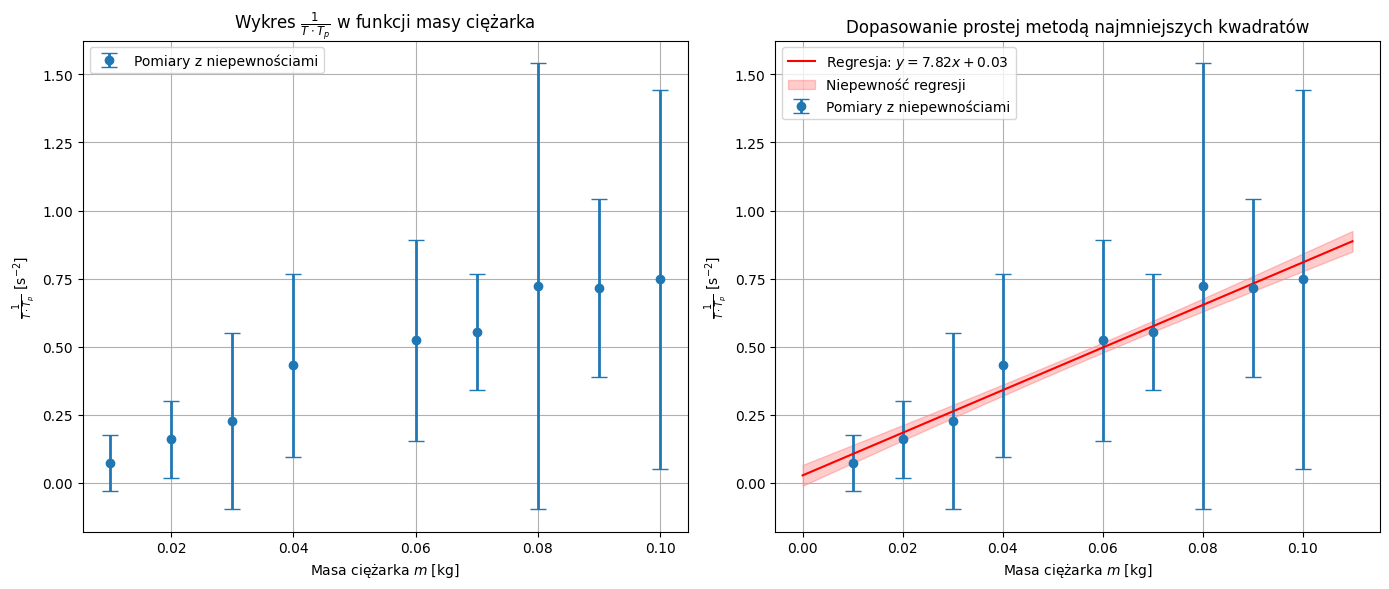

In [9]:
#wykonujemy wykres i regresję liniową dla zależności 1/(T*T_p) od masy ciężarka
#np.polyfit z cov=True zwraca macierz kowariancji współczynników
coeffs, cov = np.polyfit(masses.astype(float), T_T_p_inv.astype(float), 1, cov=True)
a, b = coeffs
u_a = np.sqrt(cov[0, 0])
u_b = np.sqrt(cov[1, 1])
print(f"Współczynniki regresji: a = {a:.2f} ± {u_a:.2f}, b = {b:.2f} ± {u_b:.2f}")

#tworzymy wykresy obok siebie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#wykres 1: surowe dane z niepewnościami
ax1.errorbar(masses, T_T_p_inv, yerr=u_T_T_p_inv, fmt='o', label='Pomiary z niepewnościami', elinewidth=2, capsize=6)
ax1.set_xlabel(r'Masa ciężarka $m$ [kg]')
ax1.set_ylabel(r'$\frac{1}{T \cdot T_p}$ [s$^{-2}$]')
ax1.set_title(r'Wykres $\frac{1}{T \cdot T_p}$ w funkcji masy ciężarka')
ax1.legend(loc='upper left')
ax1.grid()

#wykres 2: dane z regresją liniową i pasem niepewności
x_plot = np.linspace(0, max(masses) * 1.1, 100)
y_fit = a * x_plot + b
#niepewność dopasowania: sigma_y(x) = sqrt(var_a * x^2 + var_b + 2*cov_ab * x)
y_err = np.sqrt(cov[0, 0] * x_plot**2 + cov[1, 1] + 2 * cov[0, 1] * x_plot)
ax2.errorbar(masses, T_T_p_inv, yerr=u_T_T_p_inv, fmt='o', label='Pomiary z niepewnościami', elinewidth=2, capsize=6)
ax2.plot(x_plot, y_fit, 'r-', label=f'Regresja: $y = {a:.2f}x + {b:.2f}$')
ax2.fill_between(x_plot, y_fit - y_err, y_fit + y_err, color='red', alpha=0.2, label='Niepewność regresji')
ax2.set_xlabel(r'Masa ciężarka $m$ [kg]')
ax2.set_ylabel(r'$\frac{1}{T \cdot T_p}$ [s$^{-2}$]')
ax2.set_title(r'Dopasowanie prostej metodą najmniejszych kwadratów')
ax2.legend(loc='upper left')
ax2.grid()

plt.tight_layout()
plt.show()

Współczynnik regresji (przechodzącej przez początek): a = 8.20 ± 0.28


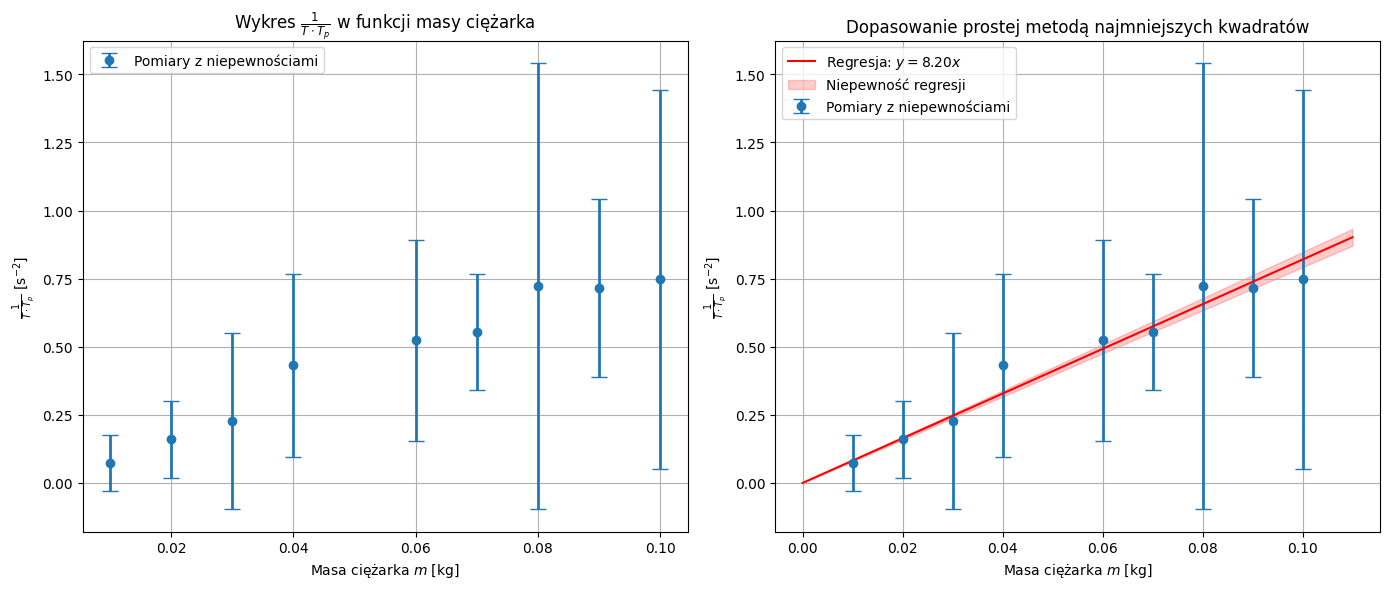

In [10]:
#analogiczną regresję można wykonać przy założeniu, że prosta przechodzi przez początek układu współrzędnych

#model y = ax. Metoda najmniejszych kwadratów: a = sum(x*y) / sum(x^2)
x = masses.astype(float)
y = T_T_p_inv.astype(float)
a_fixed_all_masses = np.sum(x * y) / np.sum(x**2)

#niepewność współczynnika a dla regresji przez początek
n = len(x)
residuals = y - a_fixed_all_masses * x
s2 = np.sum(residuals**2) / (n - 1)
u_a_fixed = np.sqrt(s2 / np.sum(x**2))

print(f"Współczynnik regresji (przechodzącej przez początek): a = {a_fixed_all_masses:.2f} ± {u_a_fixed:.2f}")

#tworzymy wykresy obok siebie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#wykres 1: surowe dane z niepewnościami
ax1.errorbar(masses, T_T_p_inv, yerr=u_T_T_p_inv, fmt='o', label='Pomiary z niepewnościami', elinewidth=2, capsize=6)
ax1.set_xlabel(r'Masa ciężarka $m$ [kg]')
ax1.set_ylabel(r'$\frac{1}{T \cdot T_p}$ [s$^{-2}$]')
ax1.set_title(r'Wykres $\frac{1}{T \cdot T_p}$ w funkcji masy ciężarka')
ax1.legend(loc='upper left')
ax1.grid()

#wykres 2: dane z regresją liniową i pasem niepewności
x_plot = np.linspace(0, max(masses) * 1.1, 100)
y_fit = a_fixed_all_masses * x_plot
y_err = u_a_fixed * np.abs(x_plot)
ax2.errorbar(masses, T_T_p_inv, yerr=u_T_T_p_inv, fmt='o', label='Pomiary z niepewnościami', elinewidth=2, capsize=6)
ax2.plot(x_plot, y_fit, 'r-', label=f'Regresja: $y = {a_fixed_all_masses:.2f}x$')
ax2.fill_between(x_plot, y_fit - y_err, y_fit + y_err, color='red', alpha=0.2, label='Niepewność regresji')
ax2.set_xlabel(r'Masa ciężarka $m$ [kg]')
ax2.set_ylabel(r'$\frac{1}{T \cdot T_p}$ [s$^{-2}$]')
ax2.set_title(r'Dopasowanie prostej metodą najmniejszych kwadratów')
ax2.legend(loc='upper left')
ax2.grid()

plt.tight_layout()
plt.show()

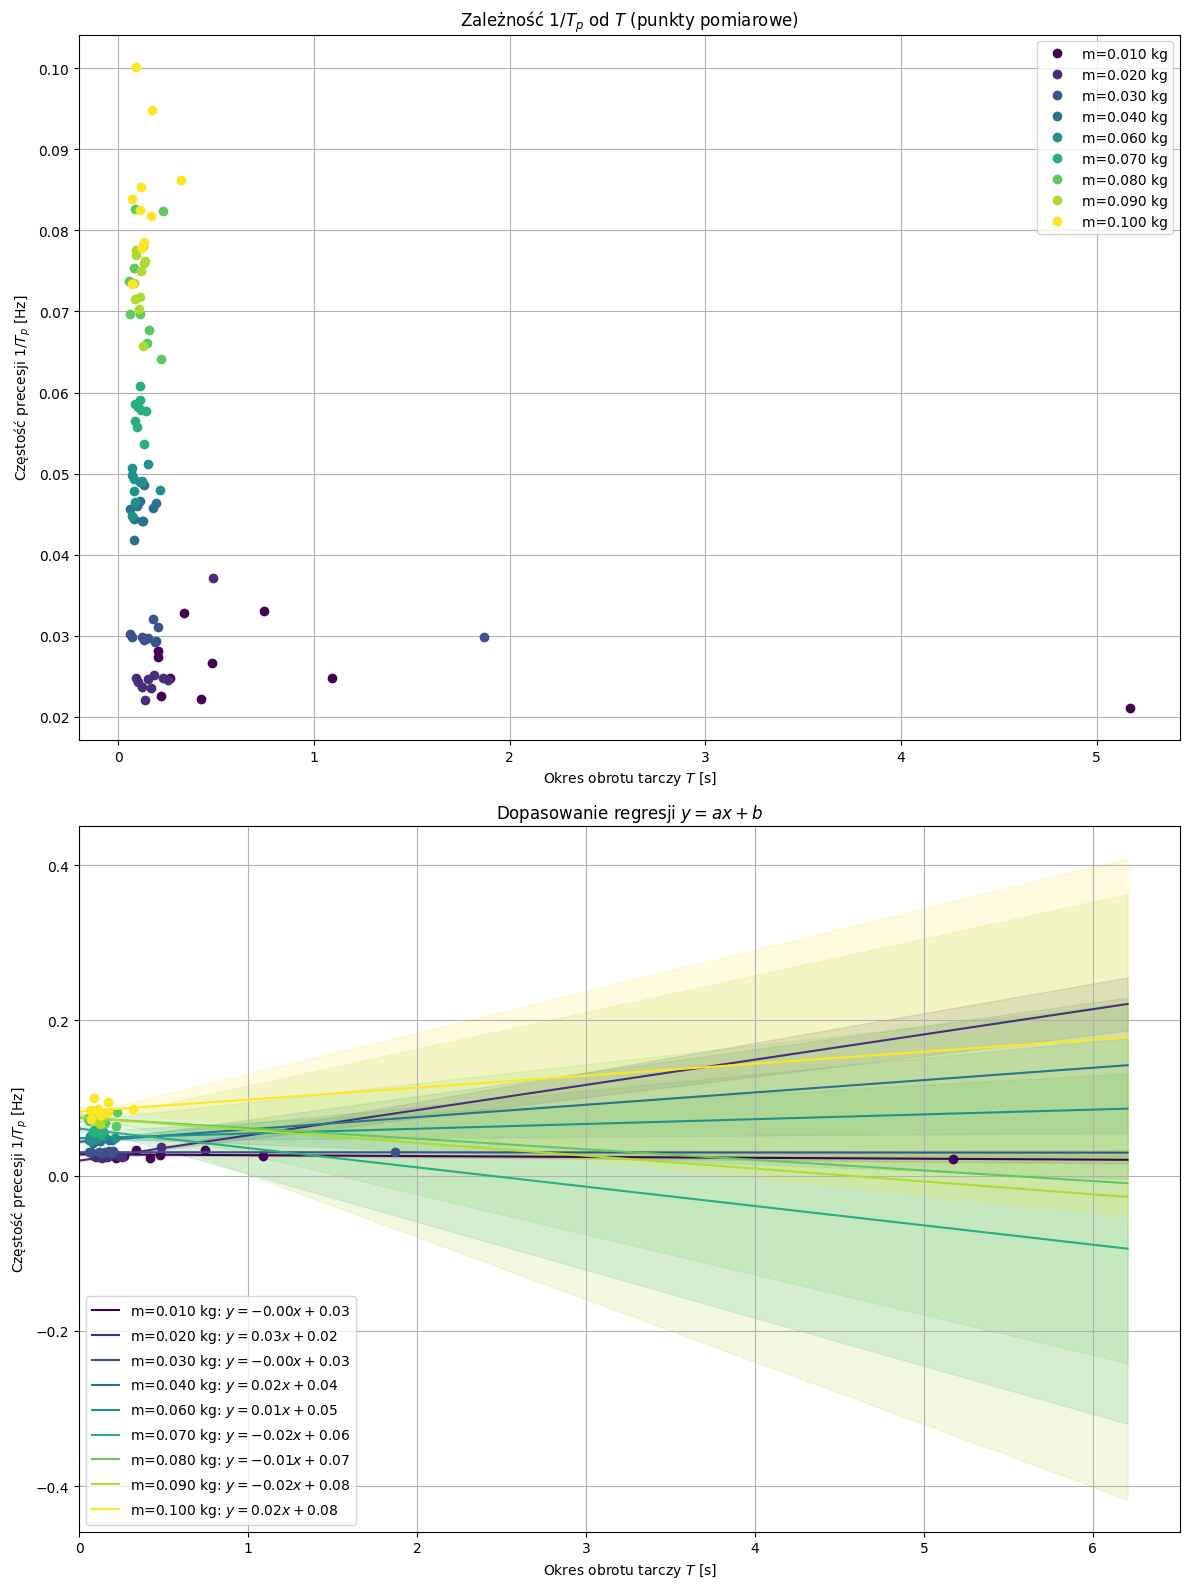

In [11]:
#teraz wykonamy wykres i regresję dla zależności 1/T_p od T grupując pomiary po masach ciężarków

#obliczamy odwrotność okresu precesji
precession_time['inv_Tp'] = 1 / precession_time['T_p']

#przygotowanie kolorów dla różnych mas
colors = plt.cm.viridis(np.linspace(0, 1, len(masses)))
max_T = precession_time['T'].max()

#wykres dla regresji y = ax + b
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

for m, color in zip(masses, colors):
    subset = precession_time[precession_time['m'] == m]
    x = subset['T'].values
    y = subset['inv_Tp'].values
    
    #wykres 1: Punkty pomiarowe
    ax1.plot(x, y, 'o', color=color, label=f'm={m:.3f} kg')
    
    #regresja y = ax + b z macierzą kowariancji
    coeffs, cov = np.polyfit(x, y, 1, cov=True)
    a, b = coeffs
    
    #wykres 2: Punkty + Regresja z pasem niepewności
    ax2.plot(x, y, 'o', color=color)
    x_plot = np.linspace(0, max_T * 1.2, 100)
    y_fit = a * x_plot + b
    y_err = np.sqrt(cov[0, 0] * x_plot**2 + cov[1, 1] + 2 * cov[0, 1] * x_plot)
    ax2.plot(x_plot, y_fit, '-', color=color, label=f'm={m:.3f} kg: $y={a:.2f}x{b:+.2f}$')
    ax2.fill_between(x_plot, y_fit - y_err, y_fit + y_err, color=color, alpha=0.15)

ax1.set_xlabel(r'Okres obrotu tarczy $T$ [s]')
ax1.set_ylabel(r'Częstość precesji $1/T_p$ [Hz]')
ax1.set_title(r'Zależność $1/T_p$ od $T$ (punkty pomiarowe)')
ax1.legend()
ax1.grid()

ax2.set_xlabel(r'Okres obrotu tarczy $T$ [s]')
ax2.set_ylabel(r'Częstość precesji $1/T_p$ [Hz]')
ax2.set_title(r'Dopasowanie regresji $y=ax+b$')
ax2.legend()
ax2.grid()
ax2.set_xlim(left=0)

plt.tight_layout()
plt.show()

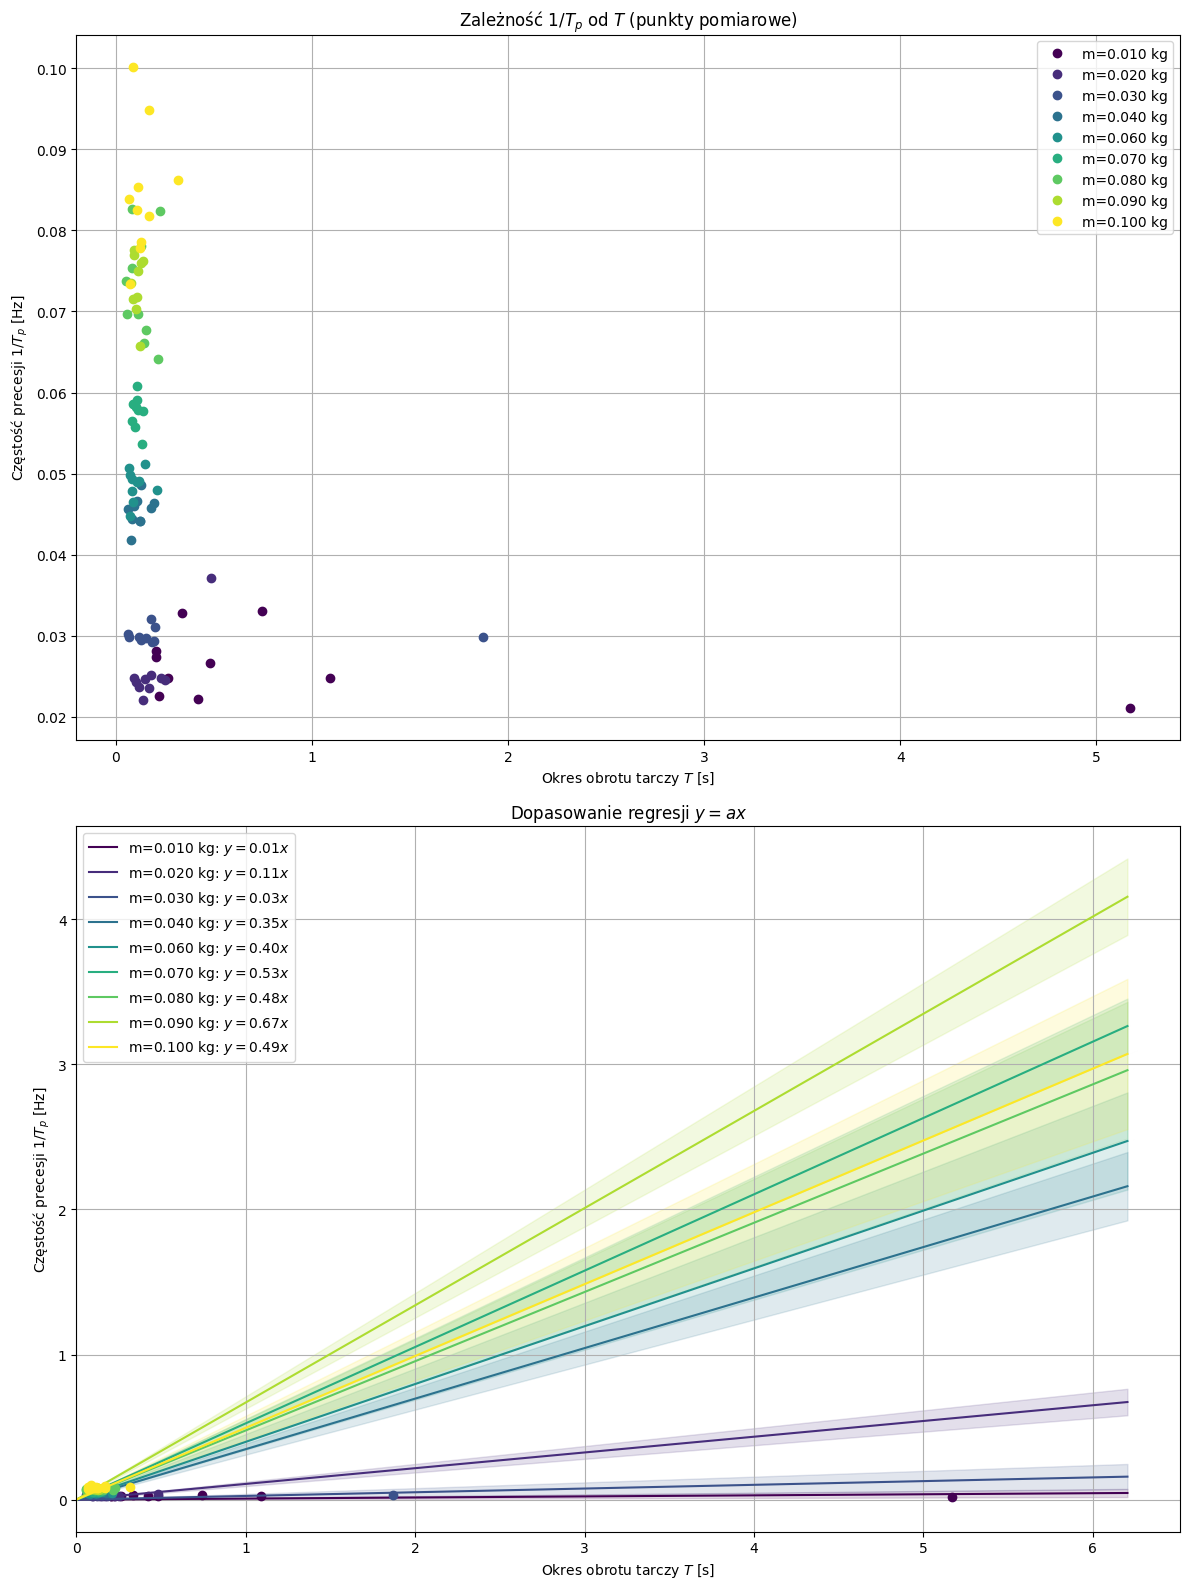

In [12]:
#wykres dla regresji y = ax (przechodzącej przez 0)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
max_T = precession_time['T'].max()

a_fixed_by_mass = {}

for m, color in zip(masses, colors):
    subset = precession_time[precession_time['m'] == m]
    x = subset['T'].values
    y = subset['inv_Tp'].values
    
    #wykres 1: Punkty pomiarowe
    ax1.plot(x, y, 'o', color=color, label=f'm={m:.3f} kg')
    
    #regresja y = ax
    #metoda najmniejszych kwadratów dla y=ax: a = sum(x*y) / sum(x^2)
    a_fixed_by_mass[m] = np.sum(x * y) / np.sum(x**2)
    
    #niepewność współczynnika a dla regresji przez początek
    n = len(x)
    residuals = y - a_fixed_by_mass[m] * x
    s2 = np.sum(residuals**2) / (n - 1)
    u_a_m = np.sqrt(s2 / np.sum(x**2))
    
    #wykres 2: Punkty + Regresja z pasem niepewności
    ax2.plot(x, y, 'o', color=color)
    x_plot = np.linspace(0, max_T * 1.2, 100)
    y_fit = a_fixed_by_mass[m] * x_plot
    y_err = u_a_m * np.abs(x_plot)
    ax2.plot(x_plot, y_fit, '-', color=color, label=f'm={m:.3f} kg: $y={a_fixed_by_mass[m]:.2f}x$')
    ax2.fill_between(x_plot, y_fit - y_err, y_fit + y_err, color=color, alpha=0.15)

ax1.set_xlabel(r'Okres obrotu tarczy $T$ [s]')
ax1.set_ylabel(r'Częstość precesji $1/T_p$ [Hz]')
ax1.set_title(r'Zależność $1/T_p$ od $T$ (punkty pomiarowe)')
ax1.legend()
ax1.grid()

ax2.set_xlabel(r'Okres obrotu tarczy $T$ [s]')
ax2.set_ylabel(r'Częstość precesji $1/T_p$ [Hz]')
ax2.set_title(r'Dopasowanie regresji $y=ax$')
ax2.legend()
ax2.grid()
ax2.set_xlim(left=0)

plt.tight_layout()
plt.show()

### 6. Obliczanie momentów bezwładności różnymi sposobami

In [13]:
#aby policzyć numeryczny moment bezwładności tą metodą musimy ustalić stałe:
g = 9.81
pi = 3.41

#ustawianie masy tarczy w kg
M_t = 1.185

#obliczamy promień tarczy
R = D / 2
u_R = u_D / 2
print(f"Promień tarczy: {R:.3f} m ± {u_R:.3f} m")

Promień tarczy: 0.130 m ± 0.014 m


#### Obliczanie momentu bezwładności przy założeniu, że tarcza jest idealnym dyskiem matematycznym

In [14]:
#wyznaczenie momentu bezwładności tarczy metodą geometryczną
J_geom = (1/2) * M_t * R**2

#obliczanie niepewności metodą różniczki zupełnej
#zakładamy, że M_t jest stałą, więc liczymy pochodną cząstkową tylko po R
#J = (1/2) * M_t * R^2
#|dJ/dR| = M_t * R
u_J_geom = ((M_t * R * u_R) ** 2) ** 0.5

#zaokrąglenie niepewności w górę do 1 cyfry znaczącej
order = math.floor(math.log10(u_J_geom))
factor = 10 ** order
u_J_geom_rounded = math.ceil(u_J_geom / factor) * factor
#zaokrąglenie wyniku do tego samego miejsca dziesiętnego
decimal_places = -order
J_geom_rounded = round(J_geom, decimal_places)

print(f"Moment bezwładności (geometryczny): {J_geom_rounded:.{decimal_places}f} kg*m^2")
print(f"Niepewność (geometryczna): {u_J_geom_rounded:.{decimal_places}f} kg*m^2")

Moment bezwładności (geometryczny): 0.010 kg*m^2
Niepewność (geometryczna): 0.003 kg*m^2


#### Obliczanie momentu bezwładności korzystając z policzonej regresji $\frac{1}{T T_p} = a \cdot m$, gdzie $a$ jest współczynnikiem regresji przechowywanej w zmiennej a_fixed_all_masses

Przekształcamy tutaj wzór podany wyżej:
$$mgr = \frac{J \cdot 4\pi^2}{T \cdot T_p} \;\Big|_{\cdot T T_p}$$
$$mgr T T_p = J \cdot 4\pi^2 \;\Big|_{\cdot \frac{1}{4\pi^2}}$$
$$J = \frac{mgr T T_p}{4\pi^2} $$
$$J = \frac{mgr}{4\pi^2 \cdot \frac{1}{T T_p}} $$
Korzystamy tutaj z regresji liniowej $\frac{1}{T T_p} = a \cdot m$
$$J = \frac{\cancel{m}gr}{4\pi^2 \cdot a \cdot \cancel{m}} $$
$$J = \frac{gr}{4\pi^2 \cdot a} $$

In [15]:
J_dyn_all_masses = (g * r) / (4 * (pi ** 2) * a_fixed_all_masses)
#do policzenia niepewności skorzystamy z tego, że uznajemy g, pi oraz a za stałe bez niepewności
u_J_dyn_all_masses = (g * u_r) / (4 * (pi ** 2) * a_fixed_all_masses)

print(f"Moment bezwładności (dynamiczny): {J_dyn_all_masses:.6f} kg*m^2")
print(f"Niepewność (dynamiczna): {u_J_geom:.6f} kg*m^2")

Moment bezwładności (dynamiczny): 0.006969 kg*m^2
Niepewność (dynamiczna): 0.002106 kg*m^2


#### Obliczanie momentu bezwładności korzystając z policzonych regresji $\frac{1}{T_p} = a \cdot T$ dla ustalonej masy $m$, gdzie $a$ jest współczynnikiem regresji przechowywanym wraz z masami w słowniku a_fixed_by_mass

Przekształcamy tutaj wzór podany wyżej:
$$mgr = \frac{J \cdot 4\pi^2}{T \cdot T_p} \;\Big|_{\cdot T T_p}$$
$$mgr T T_p = J \cdot 4\pi^2 \;\Big|_{\cdot \frac{1}{4\pi^2}}$$
$$J = \frac{mgr T T_p}{4\pi^2} $$
$$J = \frac{mgr}{4\pi^2 \cdot \frac{1}{T T_p}} $$
Korzystamy tutaj z regresji liniowej $\frac{1}{T_p} = a \cdot T$
$$J = \frac{mgr}{4\pi^2 \cdot \frac{a \cdot \cancel{T}}{\cancel{T}}} $$
$$J = \frac{mgr}{4\pi^2 \cdot a} $$

In [16]:
#obliczanie momentu bezwładności metodą dynamiczną dla każdej masy osobno
results = {}
for m in masses:
    a_fixed = a_fixed_by_mass[m]
    J_dyn = (m * g * r) / (4 * (pi ** 2) * a_fixed)
    #do policzenia niepewności skorzystamy z tego, że uznajemy g, pi oraz a za stałe bez niepewności
    u_J_dyn = (m * g * u_r) / (4 * (pi ** 2) * a_fixed)
    results[m] = (J_dyn, u_J_dyn)
    print(f"Dla masy {m:.3f} kg: Moment bezwładności (dynamiczny): {J_dyn:.6f} kg*m^2 ± {u_J_dyn:.6f} kg*m^2")

Dla masy 0.010 kg: Moment bezwładności (dynamiczny): 0.076948 kg*m^2 ± 0.002896 kg*m^2
Dla masy 0.020 kg: Moment bezwładności (dynamiczny): 0.010544 kg*m^2 ± 0.000397 kg*m^2
Dla masy 0.030 kg: Moment bezwładności (dynamiczny): 0.067089 kg*m^2 ± 0.002525 kg*m^2
Dla masy 0.040 kg: Moment bezwładności (dynamiczny): 0.006568 kg*m^2 ± 0.000247 kg*m^2
Dla masy 0.060 kg: Moment bezwładności (dynamiczny): 0.008610 kg*m^2 ± 0.000324 kg*m^2
Dla masy 0.070 kg: Moment bezwładności (dynamiczny): 0.007607 kg*m^2 ± 0.000286 kg*m^2
Dla masy 0.080 kg: Moment bezwładności (dynamiczny): 0.009588 kg*m^2 ± 0.000361 kg*m^2
Dla masy 0.090 kg: Moment bezwładności (dynamiczny): 0.007683 kg*m^2 ± 0.000289 kg*m^2
Dla masy 0.100 kg: Moment bezwładności (dynamiczny): 0.011548 kg*m^2 ± 0.000435 kg*m^2


In [17]:
#finalnie możemy przedstawić podsumowanie wyników (momenty bezwładności wraz z niepewnościami względnymi i bezwzględnymi) w formie tabeli dla metody geometrycznej oraz dynamicznej dla każdej masy osobno
summary_data = {
    'Metoda': [],
    'Masa ciężarka (kg)': [],
    'Moment bezwładności (kg*m^2)': [],
    'Niepewność (kg*m^2)': [],
    'Niepewność względna (%)': []
}

#dodajemy wynik geometryczny
summary_data['Metoda'].append('Geom.')
summary_data['Masa ciężarka (kg)'].append('N/A')
summary_data['Moment bezwładności (kg*m^2)'].append(J_geom)
summary_data['Niepewność (kg*m^2)'].append(u_J_geom)
summary_data['Niepewność względna (%)'].append((u_J_geom / J_geom) * 100)

#dodajemy wynik dynamiczny dla całego zbioru danych
summary_data['Metoda'].append('Dyn. (wszystkie masy)')
summary_data['Masa ciężarka (kg)'].append('N/A')
summary_data['Moment bezwładności (kg*m^2)'].append(J_dyn_all_masses)
summary_data['Niepewność (kg*m^2)'].append(u_J_dyn_all_masses)
summary_data['Niepewność względna (%)'].append((u_J_dyn_all_masses / J_dyn_all_masses) * 100)

#dodajemy wyniki dynamiczne dla każdej masy
for m in masses:
    J_dyn, u_J_dyn = results[m]
    summary_data['Metoda'].append('Dyn.')
    summary_data['Masa ciężarka (kg)'].append(m)
    summary_data['Moment bezwładności (kg*m^2)'].append(J_dyn)
    summary_data['Niepewność (kg*m^2)'].append(u_J_dyn)
    summary_data['Niepewność względna (%)'].append((u_J_dyn / J_dyn) * 100)

summary_df = pd.DataFrame(summary_data)
print("\nPodsumowanie wyników momentu bezwładności:")


summary_df.head(len(summary_df))


Podsumowanie wyników momentu bezwładności:


,Metoda,Masa ciężarka (kg),Moment bezwładności (kg*m^2),Niepewność (kg*m^2),Niepewność względna (%)
0,Geom.,N/A,0.009982,0.002106,21.096052
1,Dyn. (wszystkie masy),N/A,0.006969,0.000262,3.763718
2,Dyn.,0.01,0.076948,0.002896,3.763718
3,Dyn.,0.02,0.010544,0.000397,3.763718
4,Dyn.,0.03,0.067089,0.002525,3.763718
5,Dyn.,0.04,0.006568,0.000247,3.763718
6,Dyn.,0.06,0.008610,0.000324,3.763718
7,Dyn.,0.07,0.007607,0.000286,3.763718
8,Dyn.,0.08,0.009588,0.000361,3.763718
9,Dyn.,0.09,0.007683,0.000289,3.763718


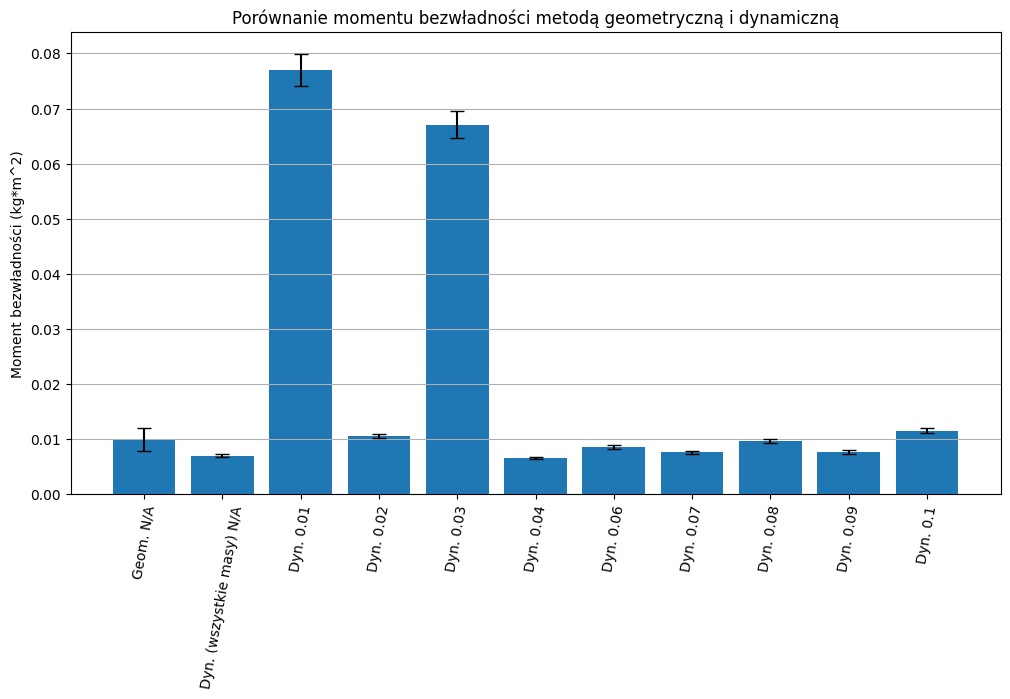

In [18]:
#przedstawiamy również te dane w formie wykresu słupkowego z niepewnościami
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df.index, summary_df['Moment bezwładności (kg*m^2)'], yerr=summary_df['Niepewność (kg*m^2)'], capsize=5)
plt.xticks(summary_df.index, summary_df['Metoda'] + ' ' + summary_df['Masa ciężarka (kg)'].astype(str), rotation=80)
plt.ylabel('Moment bezwładności (kg*m^2)')
plt.title('Porównanie momentu bezwładności metodą geometryczną i dynamiczną')
plt.grid(axis='y')
plt.show()

### 7. Interpretacja otrzymanych wyników

Jak można zauważyć na wykresie słupkowym modele dynamiczne dla mas 10g i 30g stanowczo odbiegają od reszty zarówno w kwestii wartości jak i dużo większego błędu. Powodem takich rozbieżności może być dużo większy błąd względny wyrażenia $\frac{1}{T T_p}$, które dla mas 10g i 30g wynoszą około 60%, a dla pozostałych mas wynoszą około 30-40%.

### 8. Obliczanie ostatecznego wyniku wraz z niepewnością
W tym celu obliczymy wynik odrzucając pomiary dla 10g i 30g i korzystając z obliczonych wartości dla pozostałych mas ciężarków.

In [19]:
#usuwanie mas 10g i 30g
results_filtered = {m: results[m] for m in results if m not in [0.010, 0.030]}
print("\nWyniki po usunięciu mas 10g i 30g:")
for m in results_filtered:
    J_dyn, u_J_dyn = results_filtered[m]
    print(f"Dla masy {m:.3f} kg: Moment bezwładności (dynamiczny): {J_dyn:.6f} kg*m^2 ± {u_J_dyn:.6f} kg*m^2")


Wyniki po usunięciu mas 10g i 30g:
Dla masy 0.020 kg: Moment bezwładności (dynamiczny): 0.010544 kg*m^2 ± 0.000397 kg*m^2
Dla masy 0.040 kg: Moment bezwładności (dynamiczny): 0.006568 kg*m^2 ± 0.000247 kg*m^2
Dla masy 0.060 kg: Moment bezwładności (dynamiczny): 0.008610 kg*m^2 ± 0.000324 kg*m^2
Dla masy 0.070 kg: Moment bezwładności (dynamiczny): 0.007607 kg*m^2 ± 0.000286 kg*m^2
Dla masy 0.080 kg: Moment bezwładności (dynamiczny): 0.009588 kg*m^2 ± 0.000361 kg*m^2
Dla masy 0.090 kg: Moment bezwładności (dynamiczny): 0.007683 kg*m^2 ± 0.000289 kg*m^2
Dla masy 0.100 kg: Moment bezwładności (dynamiczny): 0.011548 kg*m^2 ± 0.000435 kg*m^2


In [20]:
#obliczanie średniej ważonej J po usunięciu mas 10g i 30g
final_J = np.sum([m[0] / (m[1] ** 2) for m in results_filtered.values()]) / np.sum([1 / (m[1] ** 2) for m in results_filtered.values()])
final_u_J = (1 / np.sum([1 / (m[1] ** 2) for m in results_filtered.values()])) ** 0.5

# Zaokrąglenie niepewności w górę do 1 cyfry znaczącej
order_final = math.floor(math.log10(final_u_J))
factor_final = 10 ** order_final
final_u_J_rounded = math.ceil(final_u_J / factor_final) * factor_final
# Zaokrąglenie wyniku do tego samego miejsca dziesiętnego
decimal_places_final = -order_final
final_J_rounded = round(final_J, decimal_places_final)

print(f"Średnia ważona J po usunięciu mas 10g i 30g:")
print(f"  J = {final_J_rounded:.{decimal_places_final}f} kg·m² ± {final_u_J_rounded:.{decimal_places_final}f} kg·m²")
print(f"  Błąd względny: {100 * final_u_J / final_J:.2f}%")

# Porównanie z modelem geometrycznym
print(f"\nPorównanie z modelem geometrycznym:")
print(f"  J_dyn  = {final_J_rounded:.{decimal_places_final}f} ± {final_u_J_rounded:.{decimal_places_final}f} kg·m²")
print(f"  J_geom = {J_geom_rounded:.{decimal_places_final}f} ± {u_J_geom_rounded:.{decimal_places_final}f} kg·m²")

# Sprawdzenie zgodności w zakresie niepewności rozszerzonej (k=2)
diff = abs(final_J - J_geom)
u_diff = (final_u_J**2 + u_J_geom**2)**0.5
print(f"\n  |J_dyn - J_geom| = {diff:.6f} kg·m²")
print(f"  U(J_dyn - J_geom) (k=2) = {2*u_diff:.6f} kg·m²")

if diff <= 2 * u_diff:
    print(f"  ✓ Wyniki są ZGODNE w zakresie niepewności rozszerzonej (k=2)")
else:
    print(f"  ✗ Wyniki NIE SĄ ZGODNE w zakresie niepewności rozszerzonej (k=2)")

Średnia ważona J po usunięciu mas 10g i 30g:
  J = 0.0083 kg·m² ± 0.0002 kg·m²
  Błąd względny: 1.45%

Porównanie z modelem geometrycznym:
  J_dyn  = 0.0083 ± 0.0002 kg·m²
  J_geom = 0.0100 ± 0.0030 kg·m²

  |J_dyn - J_geom| = 0.001681 kg·m²
  U(J_dyn - J_geom) (k=2) = 0.004219 kg·m²
  ✓ Wyniki są ZGODNE w zakresie niepewności rozszerzonej (k=2)


Zatem ostatecznie wyliczony moment bezwładności tarczy to $J = 0.0083 \space kg \cdot m^2 \pm 0.0002 \space kg \cdot m^2 $